In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier


In [18]:

train_data = pd.read_csv('train-clean.csv',delimiter=",")
# GETTING THE NULL VALUES
train_data.dtypes

customer_age                  float64
job_type                        int64
marital                         int64
education                       int64
default                         int64
balance                       float64
housing_loan                    int64
personal_loan                   int64
month                           int64
last_contact_duration         float64
num_contacts_in_campaign      float64
num_contacts_prev_campaign      int64
prev_campaign_outcome           int64
term_deposit_subscribed         int64
mid_month                       int64
dtype: object

In [19]:
input_names = list(train_data.columns)
input_names.remove('term_deposit_subscribed')

all_inputs = train_data[input_names].values
all_labels = train_data['term_deposit_subscribed'].values

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

""" categorical_features = ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'month', 'prev_campaign_outcome']
encoder = OneHotEncoder(handle_unknown='ignore')
all_inputs_encoded = pd.DataFrame(encoder.fit_transform(all_inputs[categorical_features]).toarray())
all_inputs_encoded.columns = encoder.get_feature_names(categorical_features)
all_inputs_encoded.index = all_inputs.index
all_inputs_encoded = pd.concat([all_inputs.drop(categorical_features, axis=1), all_inputs_encoded], axis=1) """

all_inputs_df = pd.DataFrame(all_inputs, columns=input_names)
categorical_features = ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'month', 'prev_campaign_outcome']
encoder = OneHotEncoder(handle_unknown='ignore')
categorical_feature_indices = [all_inputs_df.columns.get_loc(col) for col in categorical_features]
all_inputs_encoded = pd.DataFrame(encoder.fit_transform(all_inputs_df.iloc[:, categorical_feature_indices]).toarray())
all_inputs_encoded.columns = encoder.get_feature_names(categorical_features)
all_inputs_encoded.index = all_inputs_df.index
all_inputs_encoded = pd.concat([all_inputs_df.drop(categorical_features, axis=1), all_inputs_encoded], axis=1)






In [21]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs_encoded.values, all_labels, test_size=0.25, random_state=1)
# Split the encoded dataset into training and testing sets
#(training_inputs, 
# testing_inputs,
# training_classes,
# testing_classes) = train_test_split(all_inputs_encoded.values, all_labels.values, test_size=0.25, random_state=1)



array([[-0.69280058, -0.09357388, -0.26627764, ...,  4.88086651,
        -2.68253946, -1.0196852 ],
       [ 1.18836903, -1.01337176, -0.26627764, ..., -0.38389216,
         0.4245467 , -1.0196852 ],
       [ 1.37648599, -0.40017317, -0.26627764, ..., -0.38389216,
         0.4245467 ,  0.98069482],
       ...,
       [-0.69280058, -0.09357388, -0.26627764, ...,  1.72201131,
        -2.68253946, -1.0196852 ],
       [-2.10367779,  1.1328233 ,  1.3736842 , ...,  0.66905958,
        -2.68253946,  0.98069482],
       [-0.22250818, -0.09357388, -0.26627764, ..., -0.38389216,
         0.4245467 ,  0.98069482]])

In [22]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()
scaler.fit(training_inputs)
training_inputs = scaler.transform(training_inputs)
testing_inputs = scaler.transform(testing_inputs)  

#scaler = StandardScaler()
#training_inputs[:, :-32] = scaler.fit_transform(training_inputs[:, :-32])
#testing_inputs[:, :-32] = scaler.transform(testing_inputs[:, :-32])

training_inputs

0.9135971518554019

In [23]:
# Create the classifier
clf = MLPClassifier(max_iter=700)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
clf.score(testing_inputs, testing_classes)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6602
           1       0.57      0.41      0.48       701

    accuracy                           0.91      7303
   macro avg       0.75      0.69      0.72      7303
weighted avg       0.90      0.91      0.91      7303



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = clf.predict(testing_inputs)
print(classification_report(testing_classes, predictions))

Text(0.5, 1.0, 'Average score: 0.9000342348510785')

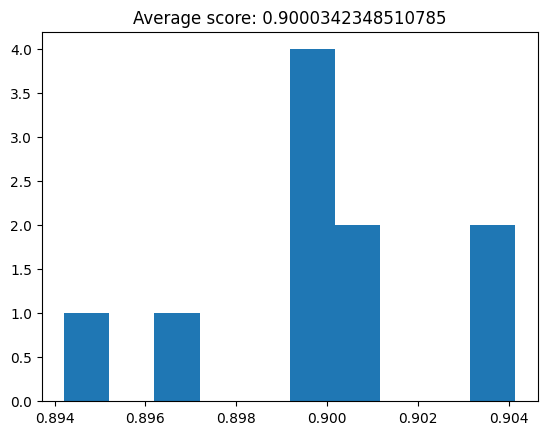

In [25]:
improved_clf = MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=50, max_iter=700)

# Train the classifier on the training set
improved_clf.fit(training_inputs, training_classes)
new_predictions = improved_clf.predict(testing_inputs)
print(classification_report(testing_classes, new_predictions))

In [26]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, all_inputs_encoded, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

[CV 1/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0.904 total time=  10.7s
[CV 2/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0.901 total time=   7.6s
[CV 3/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0.904 total time=   7.9s
[CV 4/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0.903 total time=   9.6s
[CV 5/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0.902 total time=   8.4s
[CV 6/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0.901 total time=   6.8s
[CV 7/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0.896 total time=   9.7s
[CV 8/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0

/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 6/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0.900 total time=   9.3s
[CV 7/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0.898 total time=   8.0s
[CV 8/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0.894 total time=   9.0s
[CV 9/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0.902 total time=   8.7s
[CV 10/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=100, max_iter=700, solver=adam;, score=0.899 total time=   6.9s
[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=10, max_iter=700, solver=adam;, score=0.903 total time=   6.6s
[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=10, max_iter=700, solver=adam;, score=0.901 total time=   3.3s
[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=10, max_iter=700, solver=adam;, score=0.901 total ti

/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.901 total time=  11.7s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.904 total time=   9.3s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.907 total time=   8.6s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.901 total time=   7.7s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.901 total time=   8.3s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.901 total time=   9.0s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 7/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.901 total time=   8.9s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 8/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.891 total time=  10.5s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 9/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.901 total time=  10.1s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 10/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.905 total time=  10.0s
[CV 1/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   2.2s
[CV 2/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   2.8s
[CV 3/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   3.8s
[CV 4/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   1.7s
[CV 5/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   3.7s
[CV 6/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   2.3s
[CV 7/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total ti

/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.902 total time=  44.1s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.901 total time=  46.1s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.902 total time=  46.5s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.903 total time=  50.5s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.904 total time=  53.4s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.904 total time=  49.8s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 7/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.898 total time=  49.9s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 8/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.895 total time=  40.3s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 9/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.904 total time=  49.5s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 10/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.908 total time=  49.6s
[CV 1/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=sgd;, score=0.901 total time=   3.9s
[CV 2/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=sgd;, score=0.901 total time=   2.2s
[CV 3/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=sgd;, score=0.901 total time=   4.4s
[CV 4/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=sgd;, score=0.901 total time=   5.2s
[CV 5/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=sgd;, score=0.901 total time=   4.0s
[CV 6/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=sgd;, score=0.901 total time=   3.6s
[CV 7/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=700, solver=sgd;, score=0.901 total ti

/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=lbfgs;, score=0.908 total time= 1.2min


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=lbfgs;, score=0.899 total time= 1.2min


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=lbfgs;, score=0.904 total time= 1.2min


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=lbfgs;, score=0.901 total time= 1.5min


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=lbfgs;, score=0.904 total time= 1.9min


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=lbfgs;, score=0.900 total time= 2.0min


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 7/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=lbfgs;, score=0.901 total time= 1.5min


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 8/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=lbfgs;, score=0.896 total time=  58.3s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 9/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=lbfgs;, score=0.902 total time=  59.7s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 10/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=lbfgs;, score=0.907 total time= 1.1min
[CV 1/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=sgd;, score=0.900 total time=   3.0s
[CV 2/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=sgd;, score=0.901 total time=   2.1s
[CV 3/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=sgd;, score=0.901 total time=   2.0s
[CV 4/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=sgd;, score=0.900 total time=   3.7s
[CV 5/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=sgd;, score=0.902 total time=   1.8s
[CV 6/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=sgd;, score=0.901 total time=   3.9s
[CV 7/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, max_iter=700, solver=sgd;, score=0.900 

/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.900 total time=  18.7s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.903 total time= 5.2min


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.901 total time=   6.5s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.900 total time=  18.2s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.904 total time=  16.2s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.902 total time= 5.1min


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 7/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.901 total time=   8.4s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 8/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.901 total time=  16.2s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 9/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.901 total time=  19.0s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 10/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=lbfgs;, score=0.901 total time= 5.1min
[CV 1/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   1.4s
[CV 2/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   1.3s
[CV 3/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   1.8s
[CV 4/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   3.6s
[CV 5/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   2.0s
[CV 6/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   7.4s
[CV 7/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=10, max_iter=700, solver=sgd;, score=0.901 total time=   5.

/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.903 total time=  31.4s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.902 total time=  29.9s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.902 total time=  29.0s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.903 total time=  28.3s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.905 total time=  30.9s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.899 total time=  30.5s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 7/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.898 total time=  28.6s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 8/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.897 total time=  28.8s


/Users/sofiagoncalves/Desktop/Projeto 1 IA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 9/10] END activation=tanh, alpha=0.001, hidden_layer_sizes=50, max_iter=700, solver=lbfgs;, score=0.902 total time=  31.4s


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

parameter_grid = {
    'solver': ['adam'],
    'activation' : ['tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01], 
    'hidden_layer_sizes': [10, 50, 100],
    'max_iter' : [700]}




grid_search = GridSearchCV(
    MLPClassifier(), 
    param_grid=parameter_grid, 
    cv=10,
    verbose=3)

grid_search.fit(all_inputs_encoded, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))